In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

#### 数据集读取
* Mnist数据是图像数据: (28,28,1)的灰度图

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [3]:
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

In [26]:
y = y.astype('int32')

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape

(60000, 784)

In [28]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int32

In [29]:
# 洗牌操作
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [30]:
import pandas as pd
y_train

30236    8
2356     1
1029     0
24073    8
8867     8
        ..
45737    8
17296    9
15651    3
3401     5
37328    4
Name: class, Length: 60000, dtype: int32

In [36]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [37]:
y_train_5

30236    False
2356     False
1029     False
24073    False
8867     False
         ...  
45737    False
17296    False
15651    False
3401      True
37328    False
Name: class, Length: 60000, dtype: bool

In [39]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5,random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [45]:
y_predict = sgd_clf.predict([X.iloc[30000]])
y_predict

array([False])

In [46]:
y.iloc[30000]

3

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9222 , 0.968  , 0.94495])

In [49]:
# 自定义交叉验证使用下列两个类
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

<img src='img/01.jpg'>

In [50]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [51]:
y_train_predict.shape

(60000,)

In [52]:
X_train.shape

(60000, 784)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_predict)

array([[52185,  2394],
       [  903,  4518]], dtype=int64)

<img src='img/02.jpg'>
<img src='img/03.jpg'>
<img src='img/04.jpg'>

In [54]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5, y_train_predict)

0.6536458333333334

In [55]:
recall_score(y_train_5, y_train_predict)

0.8334255672385169

<img src='img/05.jpg'>

In [56]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_predict)

0.7326684504986621

<img src='img/06.jpg'>

In [66]:
y_scores = sgd_clf.decision_function([X_train.iloc[3401]])
y_scores

array([-765270.91749109])

In [67]:
t = 0 # 这个就是阈值
y_pred = (y_scores > t)
y_pred

array([False])

<img src='img/07.jpg'>

In [69]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3 , method='decision_function')
y_scores

array([-114219.48129616,   -9997.51999287,  161018.55471396, ...,
       -174544.61459972,  133286.07112507, -290656.93356648])

In [85]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

In [86]:
thresholds.shape

(60000,)

In [87]:
thresholds[:10]

array([-3149603.50054387, -3010700.22241811, -2752709.53589729,
       -2738597.62489276, -2722709.73490325, -2711614.65482823,
       -2695429.79818716, -2682516.93551229, -2674729.14793517,
       -2662637.24698043])

In [88]:
precision.shape

(60001,)

In [89]:
recall.shape

(60001,)

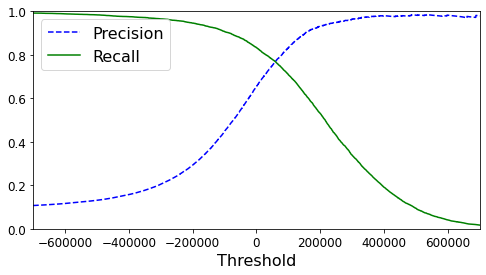

In [91]:
from cProfile import label


def plot_precision_recall_vs_threshold(precision, recall,thresholds):
    plt.plot(thresholds,precision[:-1],'b--',label='Precision')
    plt.plot(thresholds,recall[:-1],'g-',label='Recall')
    plt.xlabel('Threshold',fontsize=16)
    plt.legend(loc='upper left', fontsize=16)
    plt.ylim([0,1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precision, recall,thresholds)
plt.xlim([-700000,700000])
plt.show()

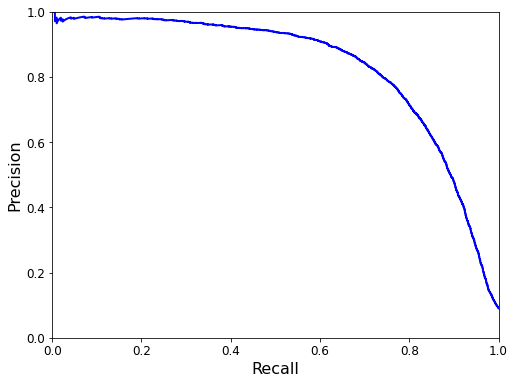

In [92]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions,'b-',linewidth=2)
    plt.axis([0,1,0,1])
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precision, recall)
plt.show()

<img src='img/08.jpg'>

In [93]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


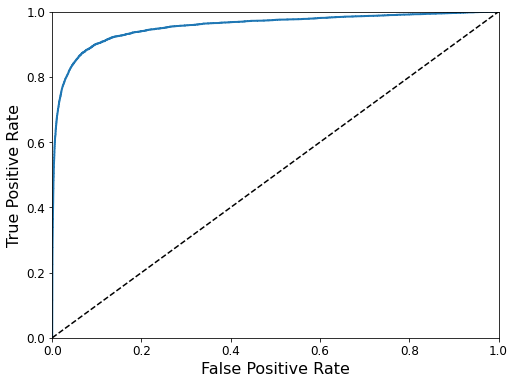

In [94]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)
plt.show()

<img src='img/09.jpg'>

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9554968323393368